In [1]:
from load_data import load_common_metadata
from outguesser import momentum_gradient_descent, maximum_a_posteriori
import pandas as pd
from training_data import sigmoid
import numpy as np
import matplotlib.pyplot as plt
game_data = load_common_metadata('../experiments')

In [2]:
game_data;

In [3]:
data = pd.read_csv("../experiments/agent_choices_poornima_0001.csv") 
data;

In [4]:
choices = data['AgentChoice']
choices;

In [5]:
trial_length = len(choices)
history_dependency = 2
w = np.zeros((history_dependency+1,trial_length))
for i in range(history_dependency,len(choices)):
    w[:,i] = momentum_gradient_descent(w[:,i-1],choices[:i])
w[:,-1]

array([ 0.05484855, -0.04973523,  0.1232346 ])

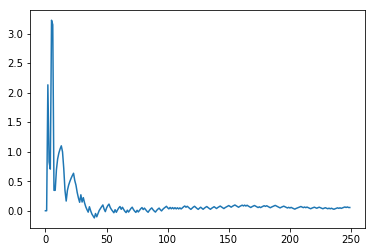

In [6]:
plt.plot(w[0,:])
#plt.plot(w[1,:])
plt.show()

In [7]:
np.sum(choices==1)/250

0.516

In [8]:
sigmoid(w[0,-1],1)

0.513708701426082

In [9]:
scores = np.zeros((9,trial_length))
for history_dependency in range(0,9):
    w = np.zeros((history_dependency+1,trial_length))
    predictions = np.zeros((trial_length,))
    for i in range(history_dependency,len(choices)):
        w[:,i] = momentum_gradient_descent(w[:,i-1],choices[:i])
        predictions[i] = maximum_a_posteriori(w[:,i-1],choices[i-history_dependency:i])
        scores[history_dependency,i] = np.sum(choices[:i]==predictions[:i])

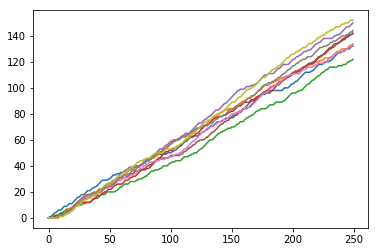

In [10]:
plt.plot(scores.T)
plt.show()

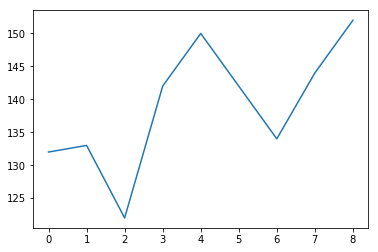

In [11]:
plt.plot(scores[:,-1])
plt.show()